In [1]:
import pandas as pd
import numpy as np
import folium
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from src.nlp_helpers import *
from src.model_helpers import *

In [2]:
data = pd.read_csv('data/AB_NYC_2019.csv')

In [3]:
data['last_review'].fillna('None', inplace=True)
data['reviews_per_month'].fillna(0.0, inplace=True)
data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Unknown', inplace=True)

In [4]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,None,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,None,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,None,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,None,0.00,6,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
data = data.merge(pd.get_dummies(data['room_type']), left_index=True, right_index=True)
data.drop(columns = 'room_type', inplace=True)

In [7]:
vectorizer, vocab = text_vectorizer(data['name'], use_tfidf=True, use_stemmer=False)
X = vectorizer(data['name'])

In [ ]:
ranges = [5,25,50,75,100]
errors = []
for n in ranges:
    nmf = NMF(n_components=n, max_iter=10, alpha=0.0)
    W = nmf.fit_transform(X)
    errors.append(nmf.reconstruction_err_)

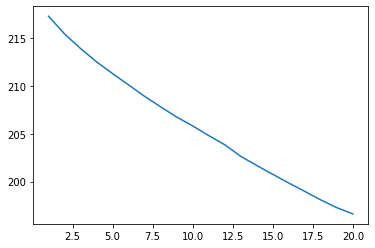

In [9]:
fig, ax = plt.subplots()
ax.plot(ranges, errors);

In [13]:
X = np.column_stack((X, data['latitude'], data['longitude'], data['minimum_nights'], data['number_of_reviews'], data['reviews_per_month'], data['calculated_host_listings_count'], data['availability_365'], data['Entire home/apt'], data['Private room'], data['Shared room']))
y = data['price'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls', n_estimators=100)

In [ ]:
cross_val(gdbr, X_train, y_train, 10)